In [2]:
using(Pkg)
Pkg.add("MatrixDepot")
Pkg.add("Plots")
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\lucas\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\lucas\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\lucas\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\lucas\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\lucas\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\lucas\.julia\environments\v1.11\Manifest.toml`


In [1]:
using(LinearAlgebra)
using(MatrixDepot)
using(Plots)
using(StatsPlots)

[ Info: verify download of index files...
[ Info: reading database


EOFError()


┌ Warning: recreating database file
└ @ MatrixDepot C:\Users\lucas\.julia\packages\MatrixDepot\4S7Oa\src\download.jl:59
[ Info: reading index files
[ Info: adding metadata...
[ Info: adding svd data...
[ Info: writing database
┌ Warning: exception during initialization: 'KeyError(MatrixDepot)'
└ @ MatrixDepot C:\Users\lucas\.julia\packages\MatrixDepot\4S7Oa\src\MatrixDepot.jl:125


In [2]:
mdinfo()
mdinfo("golub")

# Golub Matrix (golub)

Golub matrix is the product of two random unit lower and upper     triangular matrices respectively. LU factorization without pivoting     fails to reveal that such matrices are badly conditioned.

*Input options:*

  * [type,] dim: the dimension of the matrix.

*References:*

**D. Viswanath and N. Trefethen**. Condition Numbers of     Random Triangular Matrices, SIAM J. Matrix Anal. Appl. 19, 564-581,     1998.


In [3]:
n=20
A=matrixdepot("golub", n)
cond(A)

4.6043799838907366e17

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lucas\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lucas\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\lucas\.julia\packages\Plots\3u4B6\src\utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lucas\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lucas\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\lucas\.julia\packages\Plots\3u4B6\src\utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lucas\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194


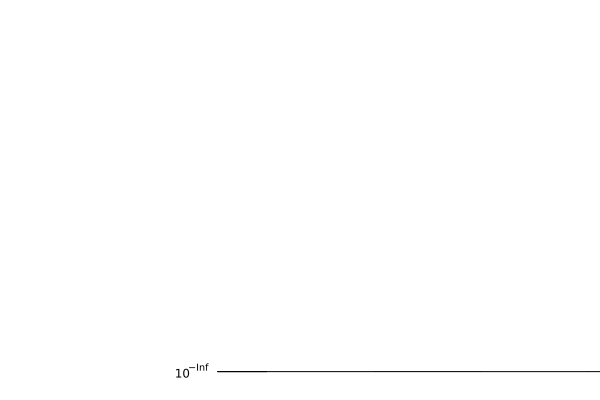

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lucas\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\lucas\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\lucas\.julia\packages\Plots\3u4B6\src\utils.jl:106


In [89]:
## TRABALHO DE ÁLGEBRA LINEAR COMPUTACIONAL

errorsApriori = zeros(10, 100)
errorsAposteriori = zeros(10, 100)
fig = plot()

for n in 1:10
    for indE in 1:100
        A = matrixdepot("golub", n)
        b= randn(n, 1)
        x=A\b
        r = A*x-b
        F = lu(A)
        errorsApriori[n, indE] = 3*norm(abs.(F.L)*abs.(F.U))*eps(1.0) # Erro apriori
        errorsAposteriori[n, indE] = maximum(abs.(r)/(abs.(A)*abs.(x)+abs.(b))) # Erro aposteriori
    end
    boxplot!([n], (errorsApriori[n, :]), yscale=:log10, label = "")
    # boxplot!([n], (errorsAposteriori[n, :]), yscale=:log10, label = "")
end


return fig